In [ ]:
from google.colab import drive
from os.path import join  

def mount_drive(ROOT):
    drive.mount(ROOT, force_remount=True)

ROOT = '/content/drive'
mount_drive(ROOT)

MY_GOOGLE_DRIVE_PATH = 'MyDrive/RL_NLP/' 
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print("PROJECT_PATH: ", PROJECT_PATH)   
%cd "{PROJECT_PATH}"

In [ ]:
!pip3 install virtualenv
!virtualenv -p python3.8.10 python38

!source /content/drive/MyDrive/Colab/RL_NLP/python38/bin/activate
!python --version

In [ ]:
!pip install -r "{PROJECT_PATH}/metadata/requirements.txt"

## First time only run.

!git clone https://github.com/Farama-Foundation/gym-examples

%cd gym-examples

!pip install -e .

%cd ..

# RUN FROM HERE.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [12]:
%cd gym-examples
!pip install -e .

[WinError 2] The system cannot find the file specified: 'gym-examples'
\\wsl.localhost\Ubuntu\home\tirthankarmittra\Desktop\IndependentStudy1_Code\NLP_RL_DELLAB\gym-examples
Obtaining file:///Z:/home/tirthankarmittra/Desktop/IndependentStudy1_Code/NLP_RL_DELLAB/gym-examples
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for gym-examples


In [13]:
import gym
import gym_examples
import numpy as np

episodes=2
env = gym.make('gym_examples/RlNlpWorld-v0',render_mode="human")

TypeError: Image data of dtype object cannot be converted to float

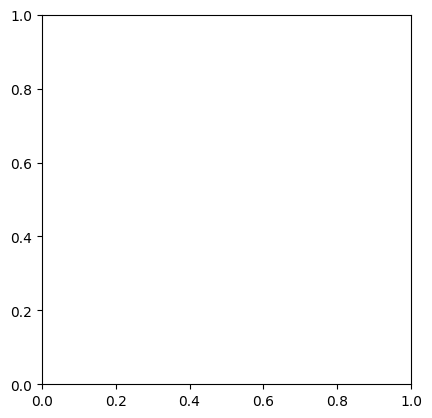

In [14]:
def policy(observation):
    return np.random.randint(0,6)

dbg=False
for _ in range(episodes):
    cumulative_reward,steps=0,0
    observation, info = env.reset(seed=42)
    cnt=0
    plt.figure()
    plt.imshow(observation["visual"])
    while True:
        action = policy(observation)  # User-defined policy function
        observation, reward, terminated, truncated, info = env.step(action)
        cumulative_reward+=reward
        steps+=1
        if dbg==True:
            print(f'cumulative_reward {cumulative_reward}; action {action}')
            plt.figure()
            plt.imshow(observation["visual"])
        if terminated or truncated:
            break
    print(f'Cumulative Reward ~ {cumulative_reward}; TimeTaken ~ {steps}')
env.close()